<a href="https://colab.research.google.com/github/Bhargavi-Singamsetty/DLT-lab/blob/main/ann_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:50]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0]], dtype=uint8)

In [ ]:
classes=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])


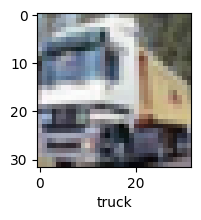

In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
plot_sample(x_train,y_train,1)

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0


MODEL

In [ ]:
from keras.api._v2.keras import activations
ann=models.Sequential([layers.Flatten(input_shape=(32,32,3)),layers.Dense(3000,activation='relu'),layers.Dense(1000,activation='relu'),layers.Dense(10,activation='softmax')])


COMPILE

In [ ]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 166s 105ms/step - loss: 1.8169 - accuracy: 0.3542
Epoch 2/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.6284 - accuracy: 0.4261
Epoch 3/5
1563/1563 [==============================] - 173s 110ms/step - loss: 1.5457 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 162s 104ms/step - loss: 1.4864 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 158s 101ms/step - loss: 1.4343 - accuracy: 0.4960


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element)for element in y_pred]
print('classification report : ',classification_report(y_test,y_pred_classes))


313/313 [==============================] - 9s 30ms/step
classification report :                precision    recall  f1-score   support

           0       0.62      0.41      0.49      1000
           1       0.57      0.63      0.60      1000
           2       0.52      0.13      0.21      1000
           3       0.28      0.42      0.34      1000
           4       0.42      0.46      0.44      1000
           5       0.35      0.46      0.40      1000
           6       0.61      0.33      0.43      1000
           7       0.54      0.54      0.54      1000
           8       0.41      0.79      0.54      1000
           9       0.63      0.39      0.48      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000

